Importing Libraries

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing required dataset

In [102]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

In [103]:
print(data.shape)
data.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [104]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Plotting Regression Plot

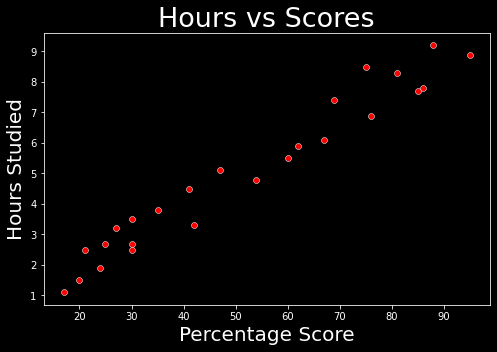

In [106]:
plt.figure(figsize=(8,5))
sns.scatterplot(data["Scores"],data["Hours"],color="red")
plt.title("Hours vs Scores",fontsize=27)
plt.xlabel("Percentage Score",fontsize = 20)
plt.ylabel("Hours Studied",fontsize = 20)
plt.show()

Plotting  The Countplot

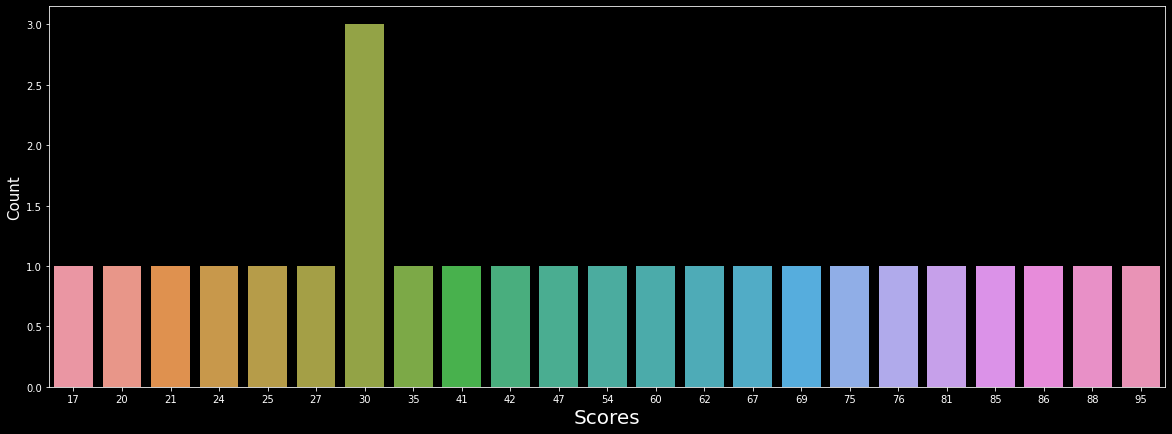

In [107]:
plt.figure(figsize=(20,7))
sns.countplot(data["Scores"])
plt.xlabel("Scores",fontsize=20)
plt.ylabel("Count",fontsize=15)
plt.show()

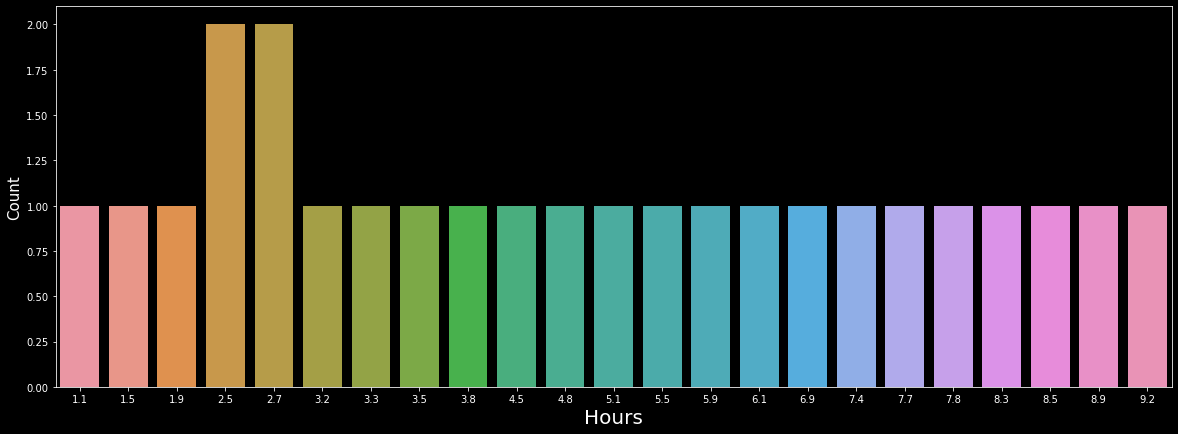

In [108]:
plt.figure(figsize=(20,7))
sns.countplot(data["Hours"])
plt.xlabel("Hours",fontsize=20)
plt.ylabel("Count",fontsize=15)
plt.show()

In [109]:
X = data.iloc[:,:-1].values
Y = data.iloc[:, 1].values

Splitting Dataset into train and test

In [110]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

Training the Regression Model
 

In [111]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [112]:
print("X_train shape = {} X_test shape = {}\nY_train shape = {} Y_test shape = {}".format(x_train.shape,x_test.shape,y_train.shape,y_test.shape))


X_train shape = (20, 1) X_test shape = (5, 1)
Y_train shape = (20,) Y_test shape = (5,)


In [113]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Accuracy Score

In [114]:
print("Train score = {}".format(model.score(x_train,y_train)))
print("Test score = {}".format(model.score(x_test,y_test)))

Train score = 0.9515510725211553
Test score = 0.9454906892105354


In [115]:
pred = model.predict(x_train)

Plotting Regresssion line


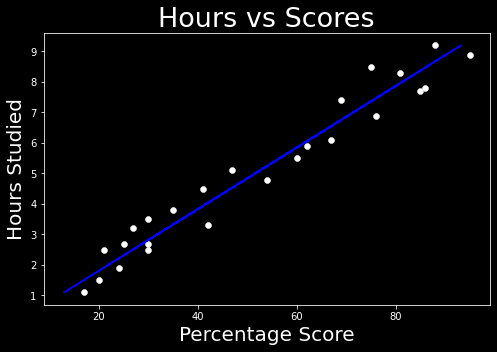

In [116]:
 plt.figure(figsize=(8,5))
sns.scatterplot(data["Scores"],data["Hours"],color="white")
plt.plot(pred,x_train,color="b")
plt.title("Hours vs Scores",fontsize=27)
plt.xlabel("Percentage Score",fontsize = 20)
plt.ylabel("Hours Studied",fontsize = 20)
plt.show()

Evaluation of model using root mean square error:

In [117]:
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train,model.predict(x_train))
test_mse = mean_squared_error(y_test,model.predict(x_test))

In [118]:
print("RMSE for train data = {}".format(np.sqrt(train_mse)))
print("RMSE for test data = {}".format(np.sqrt(test_mse)))

RMSE for train data = 5.558613350226344
RMSE for test data = 4.647447612100373


Predicting percentage score for 9.25 hrs/day

In [119]:
hours = 9.25
pred = model.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539
